In [ ]:
#aaa 

orig. is from https://github.com/empet/Math

orig. :
NOTE! The code below for mayavi plots is unchanged from the first version (2014) of this notebook because mayavi is no more installed on my system. Hence it is possible to be deprecated #aaaa!a

In [ ]:
from IPython.display import Image    #aaa


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

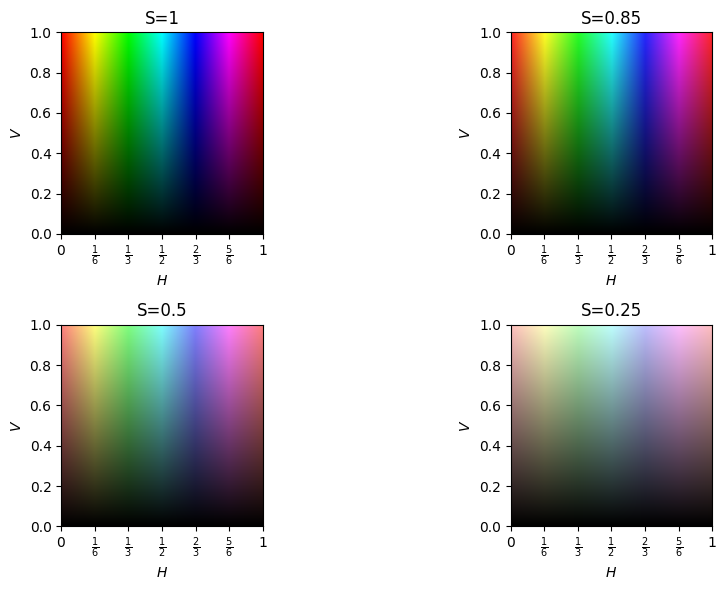

In [3]:
plt.rcParams['figure.figsize'] = 10, 6
sat = [1.0, 0.85, 0.5, 0.25]
svals = ['S=1', 'S=0.85', 'S=0.5', 'S=0.25']
for k, s in zip(range(4), sat):
    V, H = np.mgrid[0:1:200j, 0:1:200j]
    S = s * np.ones(H.shape)  
    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    plt.subplot(2,2,k+1)
    plt.imshow(RGB, origin="lower", extent=[0, 1, 0, 1])
    plt.xticks([0, 1/6, 1/3, 1/2,  2/3, 5/6, 1],
    ['$0$', r'$\frac{1}{6}$', r'$\frac{1}{3}$', r'$\frac{1}{2}$', r'$\frac{2}{3}$',
     r'$\frac{5}{6}$', '$1$'])
    plt.xlabel("$H$")
    plt.ylabel("$V$")
    plt.title(svals[k])
plt.tight_layout()  

In [31]:
def g(x):
    return (1- 1/(1+x**2))     #**     0.5   # 0.4 #0.2   

In [32]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

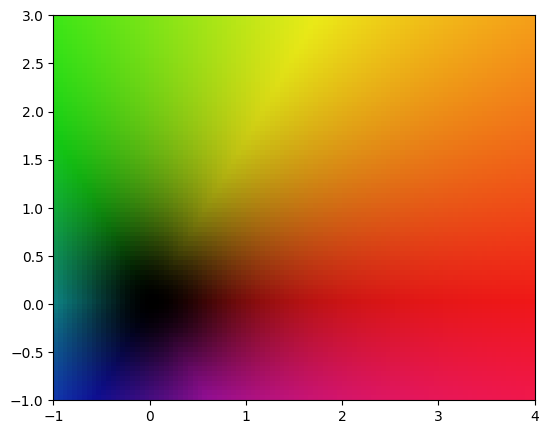

In [33]:
x = np.arange(-1,4, 0.05)
y = np.arange(-1,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

In [34]:
def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
    # re and im are  tuples, re=(a, b) and im=(c, d), defining the rectangular region
    # N is the number of discrete points per unit interval 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z) 

In [35]:
def domaincol_c(w, s):#Classical domain coloring
    # w is the  array of values f(z)
    # s is the constant saturation
    
    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB         

In [65]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.7,
                N= 32,  # 16,  # 64,  # 100,   #200,
                daxis=None):
# s=0.9    
# 
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

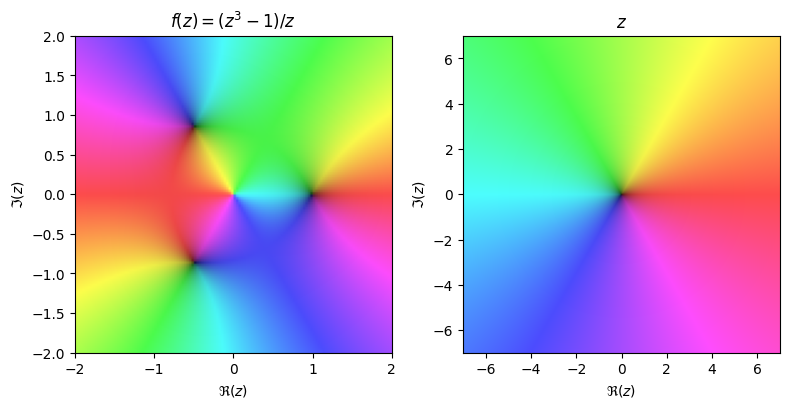

In [66]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_c, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
plt.tight_layout()  

https://de.wikibooks.org/wiki/Serlo:_EN:_Drawing_complex-valued_functions#Einfache_Beispiele

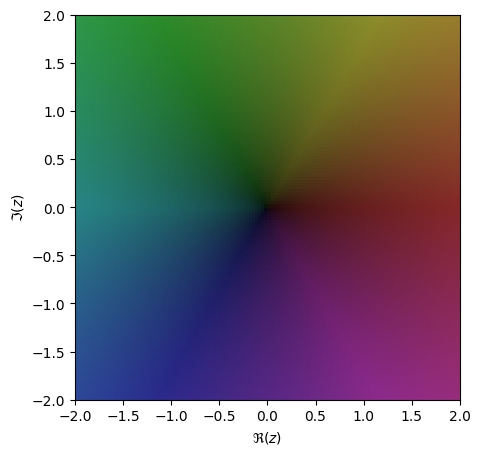

In [67]:
#plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
#plt.subplot(1, 2, 1)
f = lambda z: z/10 # (z**2 - 1)  #/z
# , title='$f(z)=(z^3-1)/z$'
plot_domain(domaincol_c, f, re=ab, im= cd, daxis=True)
#plt.subplot(1,2,2)
#plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
#plt.tight_layout()  

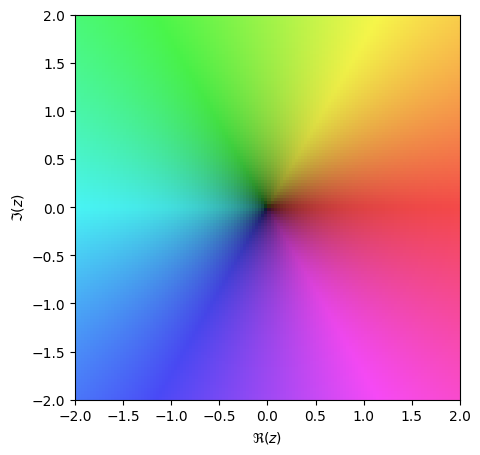

In [68]:
plot_domain(domaincol_c,  lambda z: z , re=ab, im= cd, daxis=True)


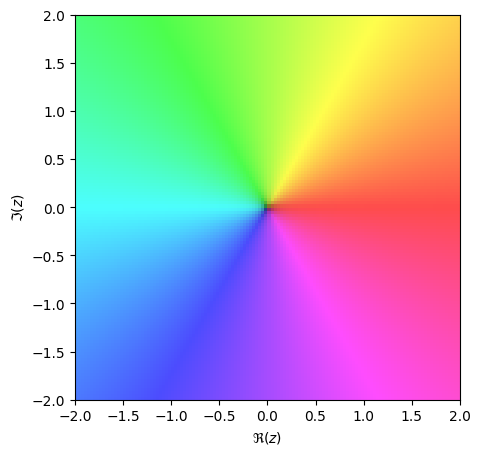

In [69]:
plot_domain(domaincol_c,  lambda z: z*10 , re=ab, im= cd, daxis=True)


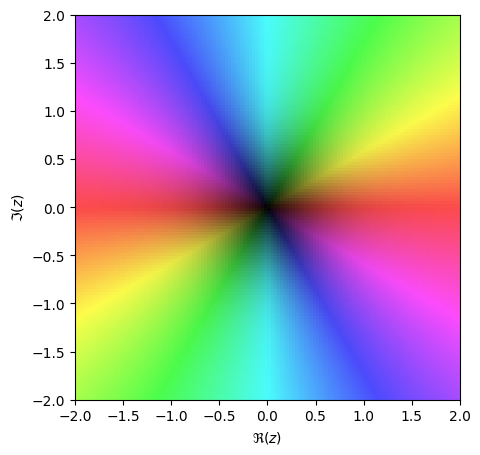

In [70]:
plot_domain(domaincol_c,  lambda z: z*z , re=ab, im= cd, daxis=True)


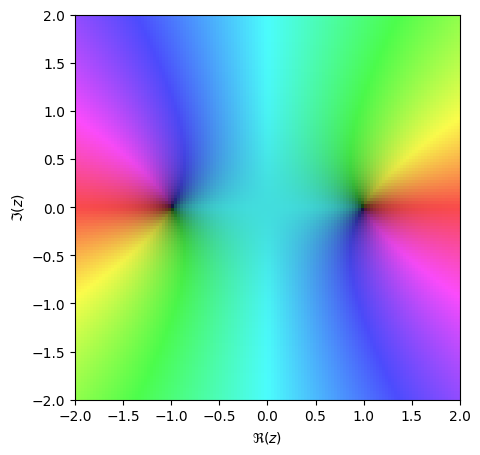

In [72]:
plot_domain(domaincol_c,  lambda z: z*z - 1 , re=ab, im= cd, daxis=True)


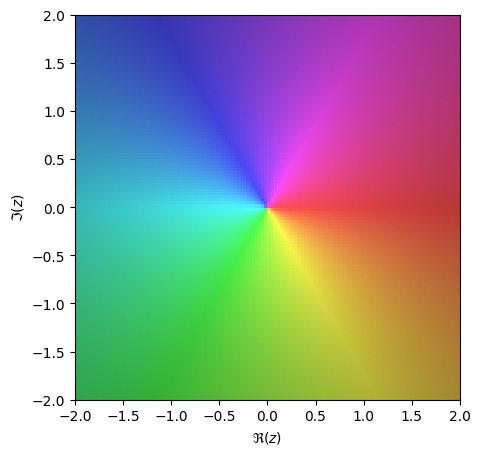

In [71]:
plot_domain(domaincol_c,  lambda z: 1/z , re=ab, im= cd, daxis=True)
